# Student Performance Indicator

*Life cycle of Machine learning Project*
*  Understanding the Problem Statement
*  Data Collection
*  Data Checks to perform
*  Exploratory data analysis
*  Data Pre-Processing
*  Model Training
*  Choose best model

1) Problem statement
*  This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
*  Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
*  The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Import the CSV Data as Pandas DataFrame
df = pd.read_csv(r'D:\DS-AB\Project\MLOps_Project\notebook\raw_data.csv')

In [30]:
df.shape

(1000, 8)

# 2.2 Dataset information

*  gender : sex of students -> (Male/female)
*  race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
*  parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
*  lunch : having lunch before test (standard or free/reduced)
*  test preparation course : complete or not complete before test
*  math score
*  reading score
*  writing score

# 3. Data Checks to perform

*  Check Missing values
*  Check Duplicates
*  Check data type
*  Check the number of unique values of each column
*  Check statistics of data set
*  Check various categories present in the different categorical column

# 3.1 Check Missing values

In [31]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**Conclusion:** 
*  There are no missing values in the data set

# 3.2 Check Duplicates

In [32]:
df.duplicated().sum()

np.int64(0)

**Conclusion:**
*  There are no duplicates values in the data set

# 3.3 Check data types

In [33]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 3.4 Checking the number of unique values of each column

In [34]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# 3.5 Check statistics of data set

In [35]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Conclusion:**
*  From above description of numerical data, all means are very close to each other - between 66 and 68.05;
*  All standard deviations are also close - between 14.6 and 15.19;
*  While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

# 3.6 Exploring Data

In [36]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,master's degree,standard,none,62,70,75
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83
2,female,group D,some college,free/reduced,none,79,89,86
3,male,group C,master's degree,free/reduced,none,61,67,66
4,male,group E,high school,standard,none,73,64,57


In [37]:
# Finding unquie items in each columns

print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group D' 'group C' 'group E' 'group B' 'group A']
Categories in'parental level of education' variable: ["master's degree" "bachelor's degree" 'some college' 'high school'
 "associate's degree" 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [38]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']       # 'O' just stands for “object” which is a string 
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']   

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# 3.7 Adding columns for "Total Score" and "Average"

In [39]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = round((df['total score']/3),2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group D,master's degree,standard,none,62,70,75,207,69.00
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83,232,77.33
2,female,group D,some college,free/reduced,none,79,89,86,254,84.67
3,male,group C,master's degree,free/reduced,none,61,67,66,194,64.67
4,male,group E,high school,standard,none,73,64,57,194,64.67


In [40]:
df[df['writing_score'] == 100]['writing_score'].count()


np.int64(14)

In [41]:
#No of students with full marks in maths , writing and reading

math_full = df[df['math_score'] == 100]['math_score'].count()
writing_full = df[df['writing_score'] == 100]['writing_score'].count()
reading_full = df[df['reading_score'] == 100]['reading_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [42]:
#No of students with less than 20 marks in maths , writing and reading

math_less_20 = df[df['math_score'] <= 20]['math_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['writing_score'].count()
reading_less_20 = df[df['reading_score'] <= 20]['reading_score'].count()


print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Conclusion:**
*  From above values we get students have performed the worst in Maths
*  Best performance is in reading section

# 4. Exploring Data ( Visualization )

4.1 Visualize average score distribution to make some conclusion.
*  Histogram
*  Kernel Distribution Function (KDE)

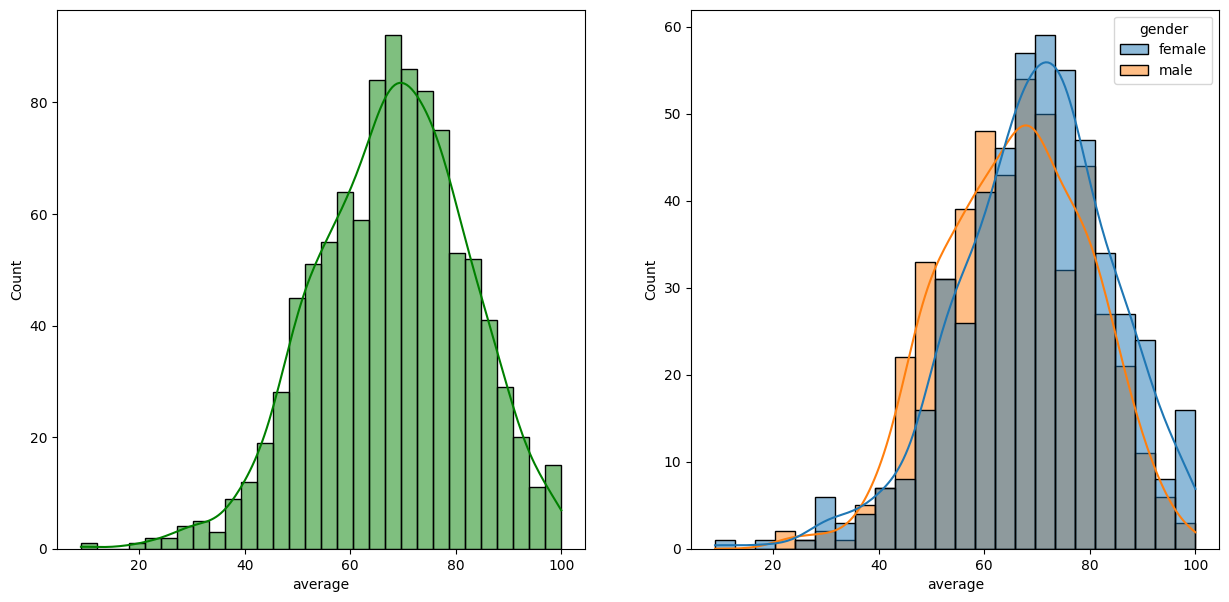

In [43]:
#Checking average & total score porformance of students genderwise

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)           #1st plot 1 divided in 2 part , 1st part i.e. 121
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')

plt.subplot(122)           #2nd plot 1 divided in 2 part , 2nd part i.e. 122
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

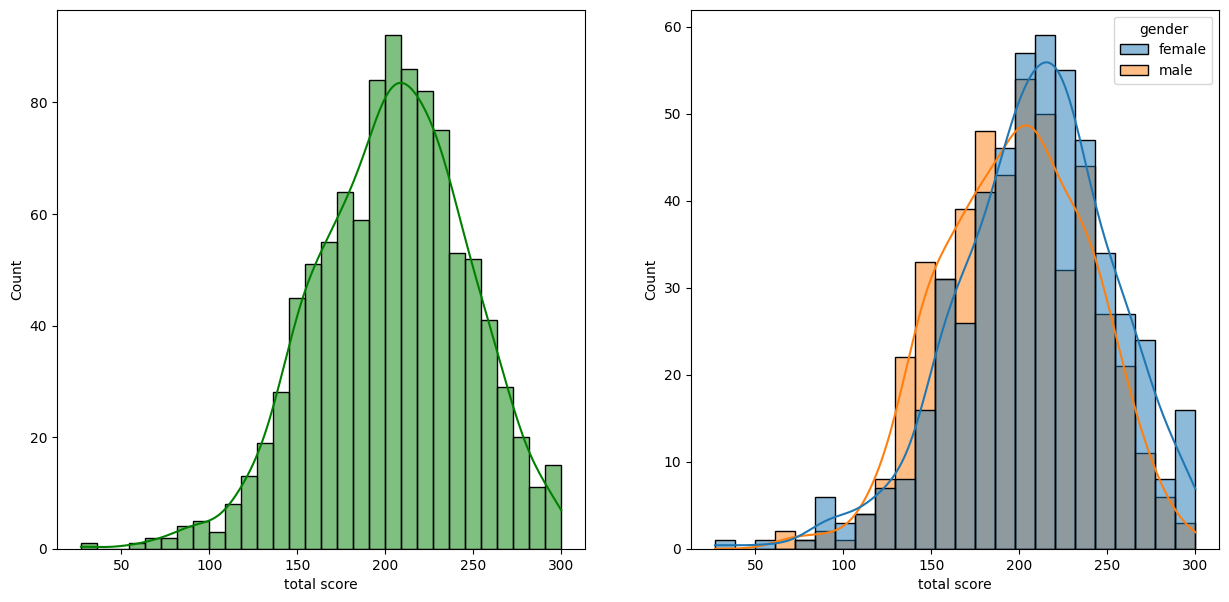

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')

plt.show()

**Conclusion:**
* female students performed better than male students in both average and total scores.

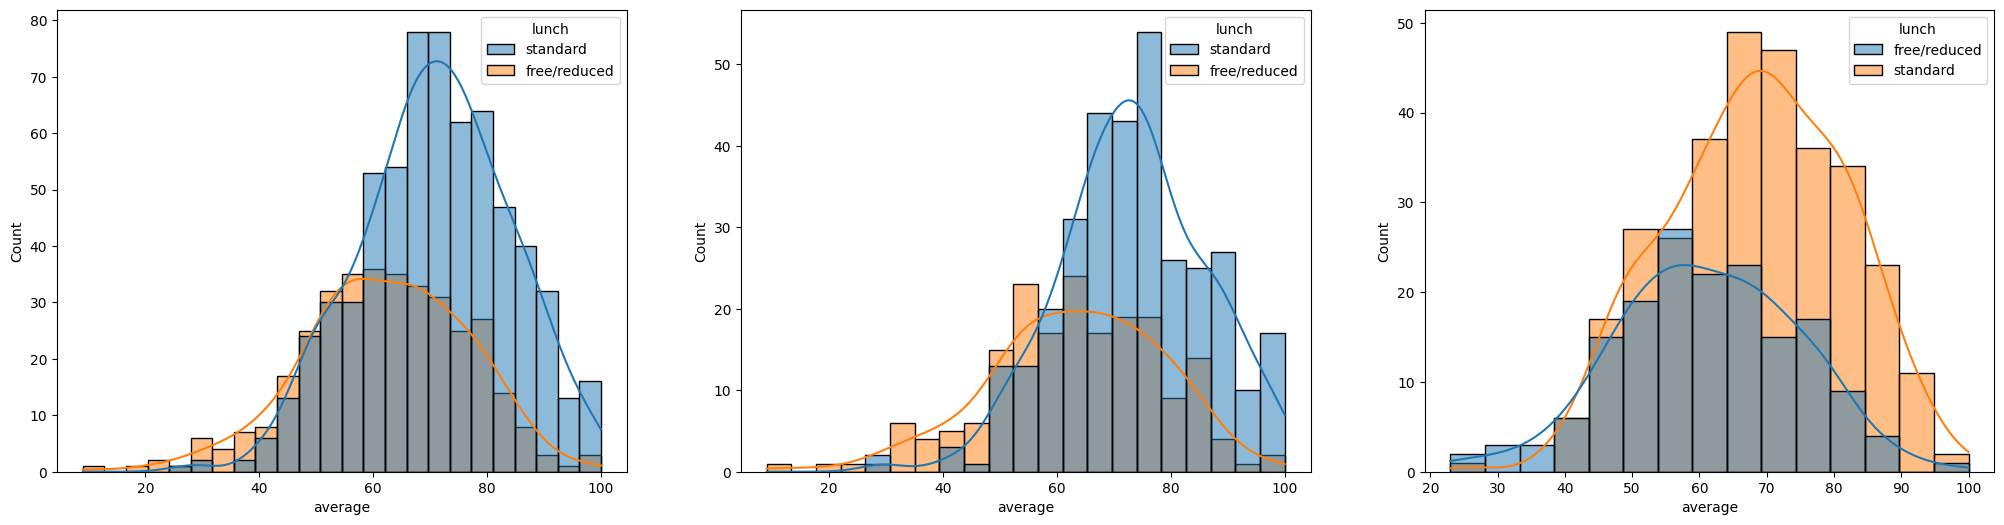

In [45]:
#Checking impact of type Lunch on students performance.

plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

plt.show()

**Conclusion:**
*  Standard lunch helps to perform well in the exams.
*  Standard lunch helps to perform well in exams be it a male or a female.

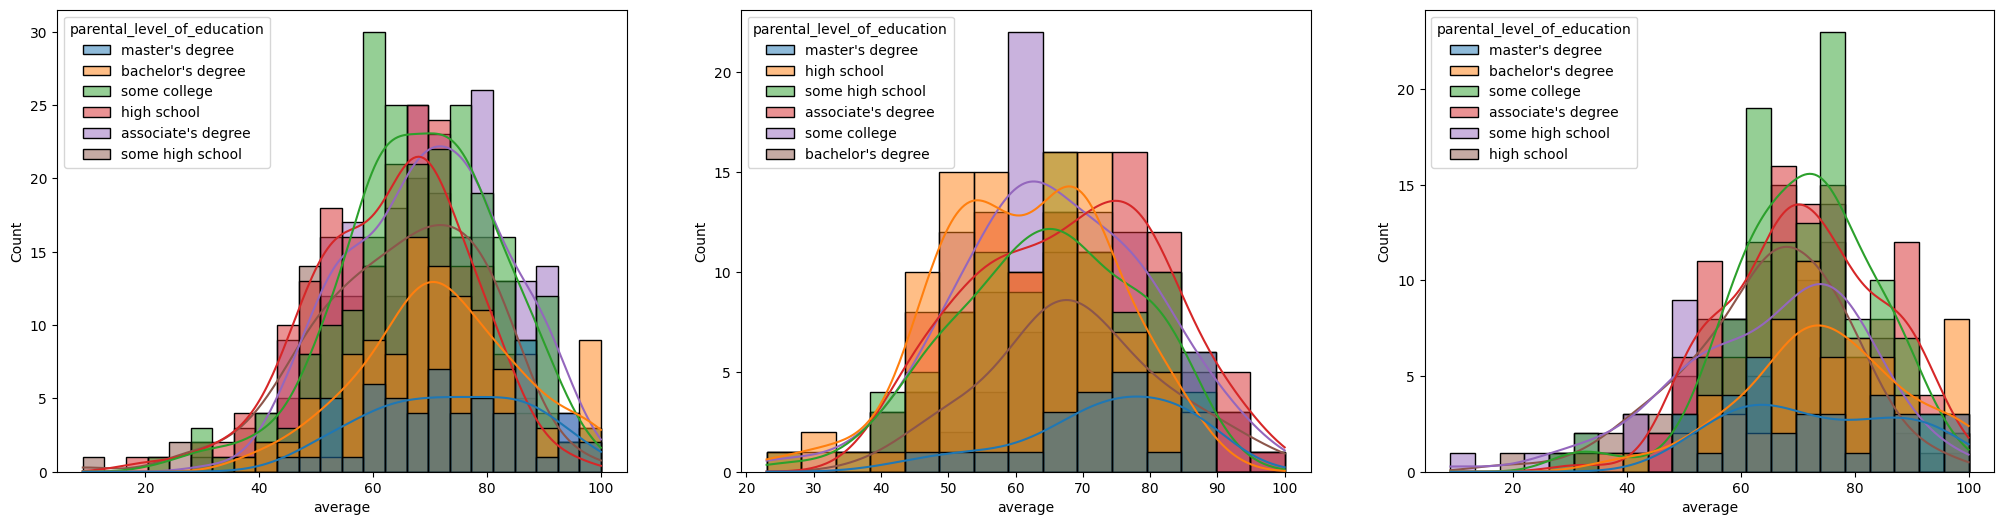

In [46]:
#Checking impact of parent_level_of_education on students performance.

plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')

plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')

plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')

plt.show()

**Conclusion:**
*  1st plot parent's education don't help student perform well in exam.
*  2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
*  3rd plot we can see there is no effect of parent's education on female students.

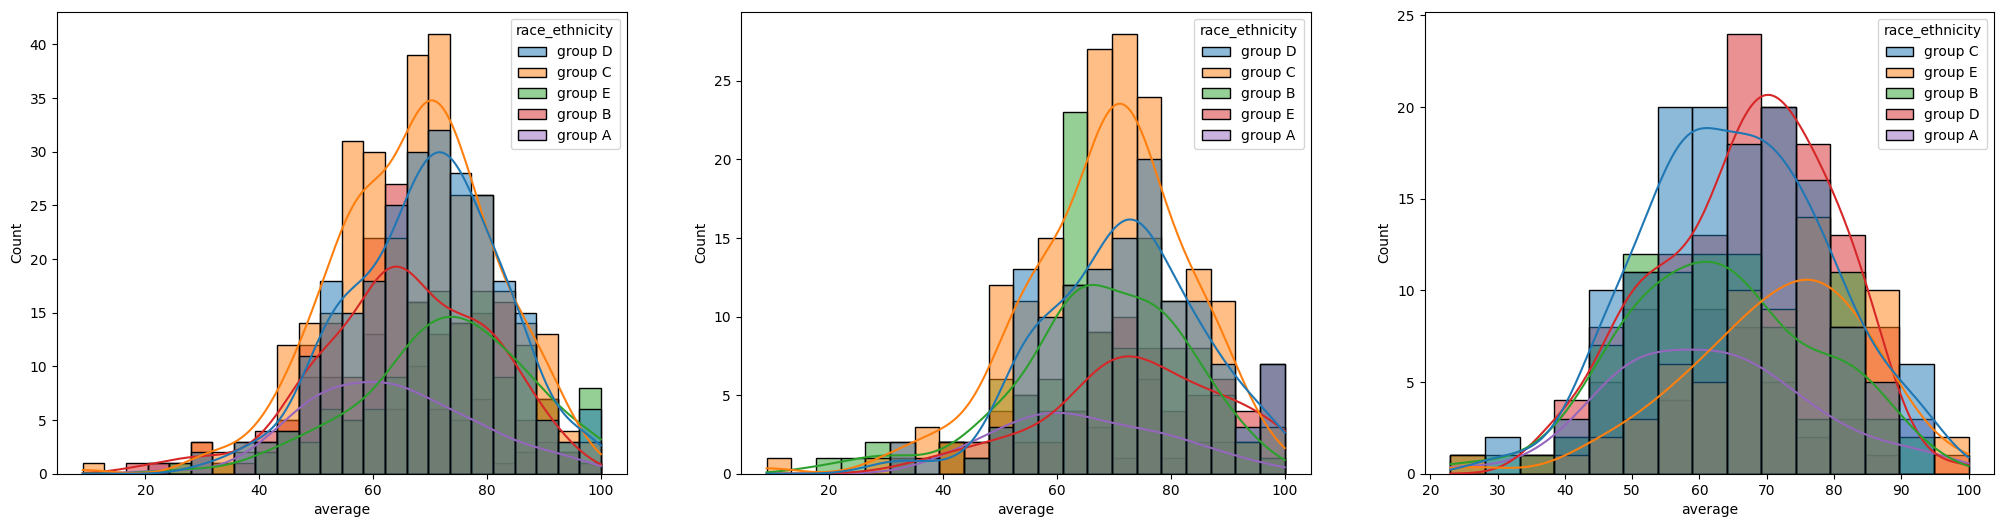

In [47]:
#Checking impact of race_ethnicity on students performance.

plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')

plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')

plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')

plt.show()

**Conclusion:**
*  Students of group A & group B tends to perform poorly in exam.
*  Students of group A perform poorly in exam irrespective of whether they are male or female

# 4.2 CHECKING OUTLIERS

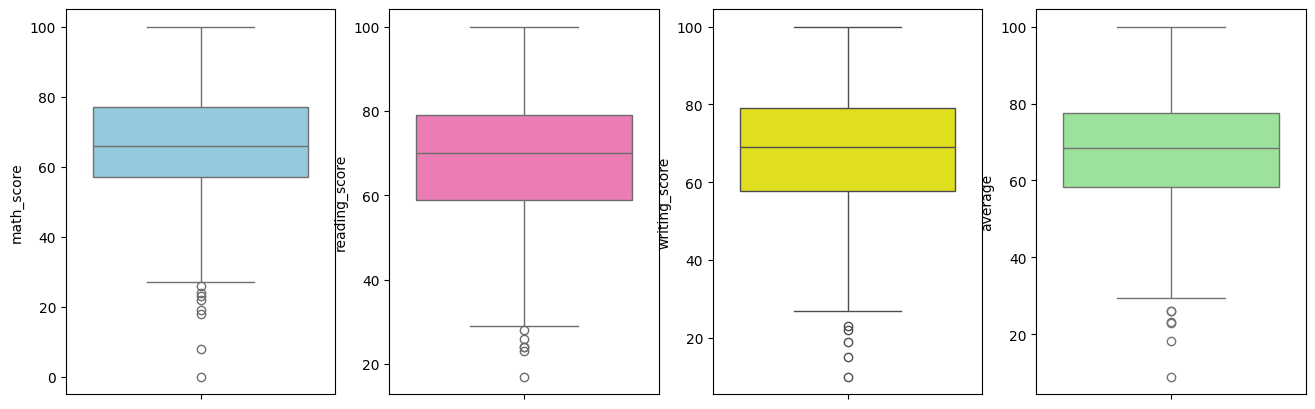

In [48]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

# 4.3 Maximumum score of students in all three subjects

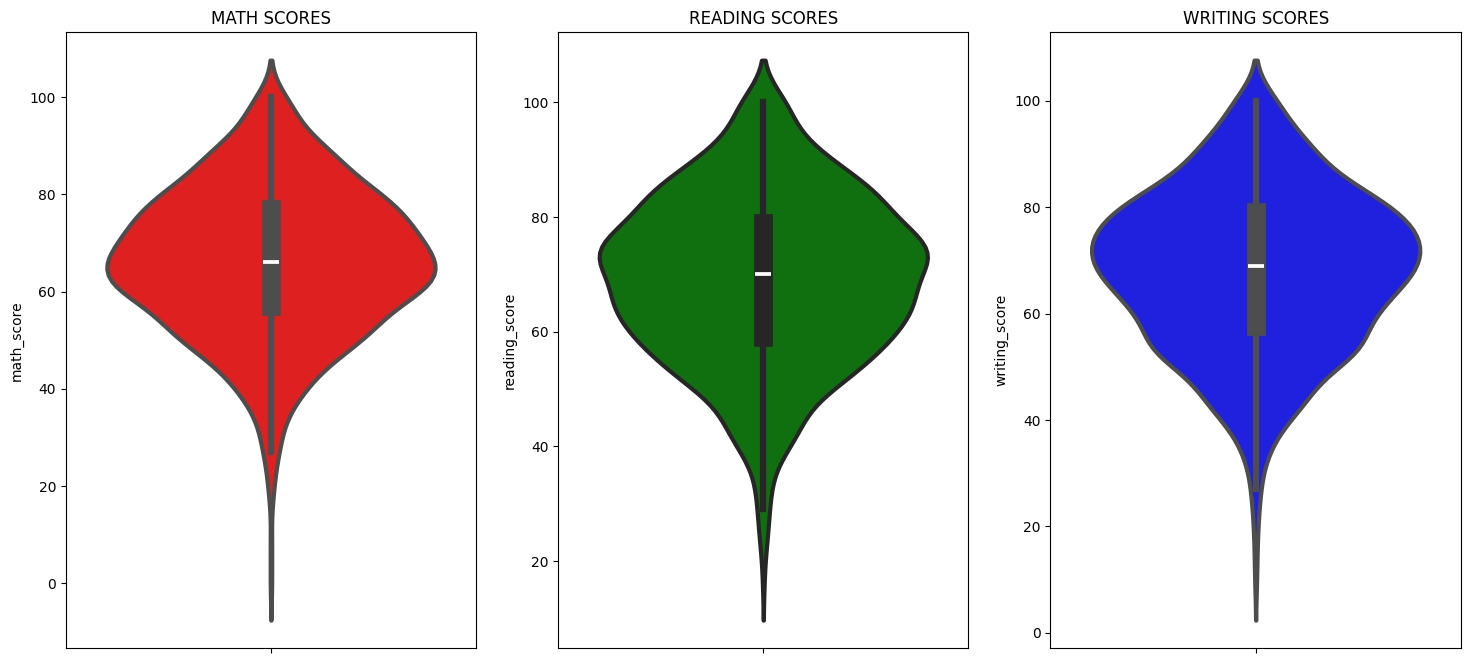

In [49]:
plt.figure(figsize=(18,8))

plt.subplot(131)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)

plt.subplot(132)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)

plt.subplot(133)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)

plt.show()

**Conclusion:**
*  From the above three plots its clearly visible that most of the students score in between 60-80 in Maths
*  In reading and writing most of them score from 50-80

# 4.4 Multivariate analysis using pieplot

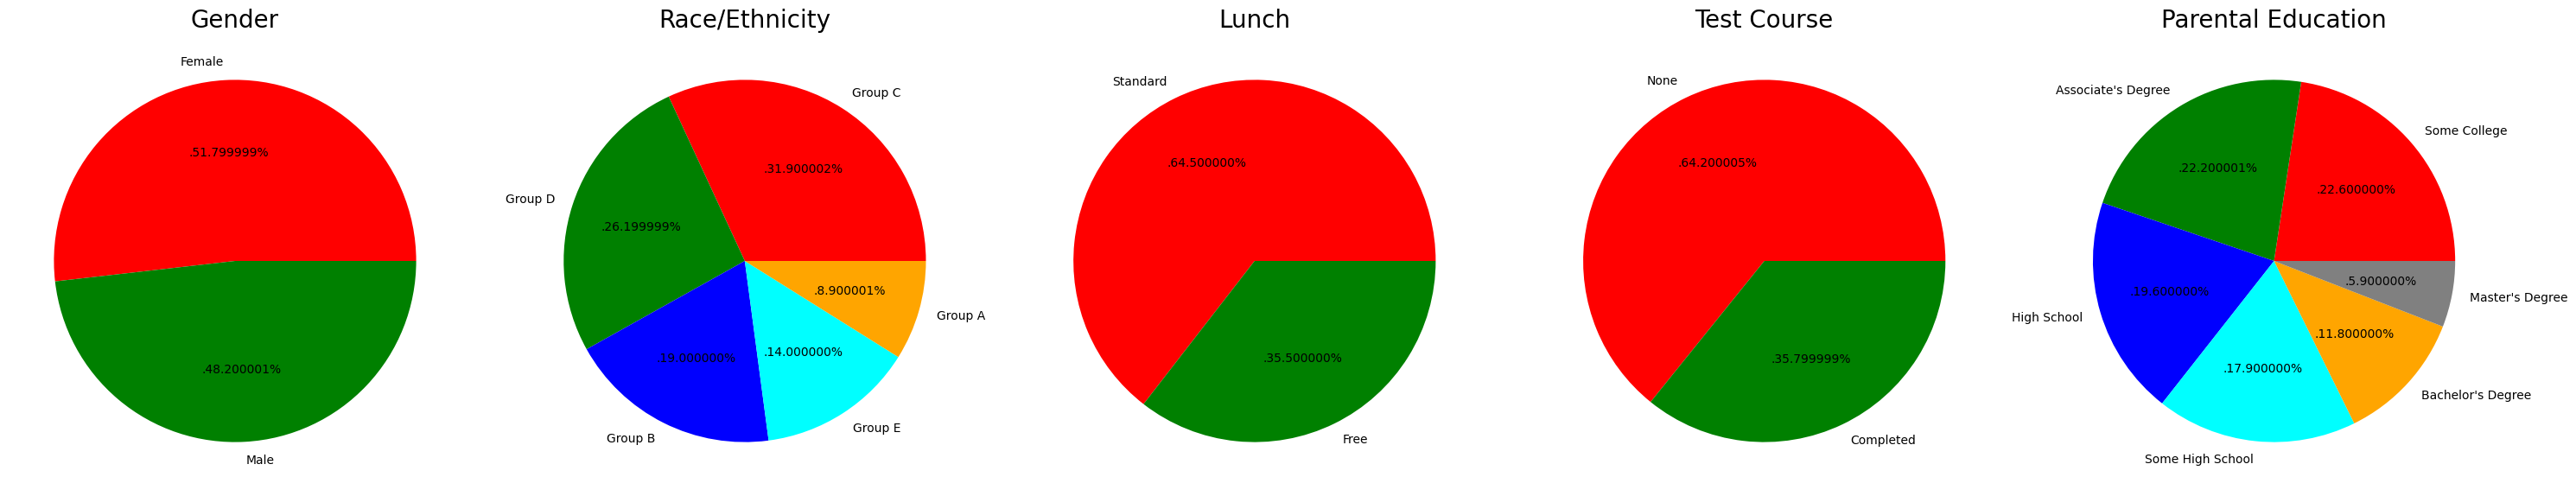

In [50]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()

**Conclusion:**
*  Number of Male and Female students is almost equal i.e. with female students are 48% and male students are 52%
*  Number students are greatest in Group C, followed by group D
*  Number of students who have standard lunch are greater , Lowest number of students belong to groupA.
*  Number of students who have not enrolled in any test preparation course is greater
*  Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# 4.5  MUTIVARIATE ANALYSIS USING PAIRPLOT

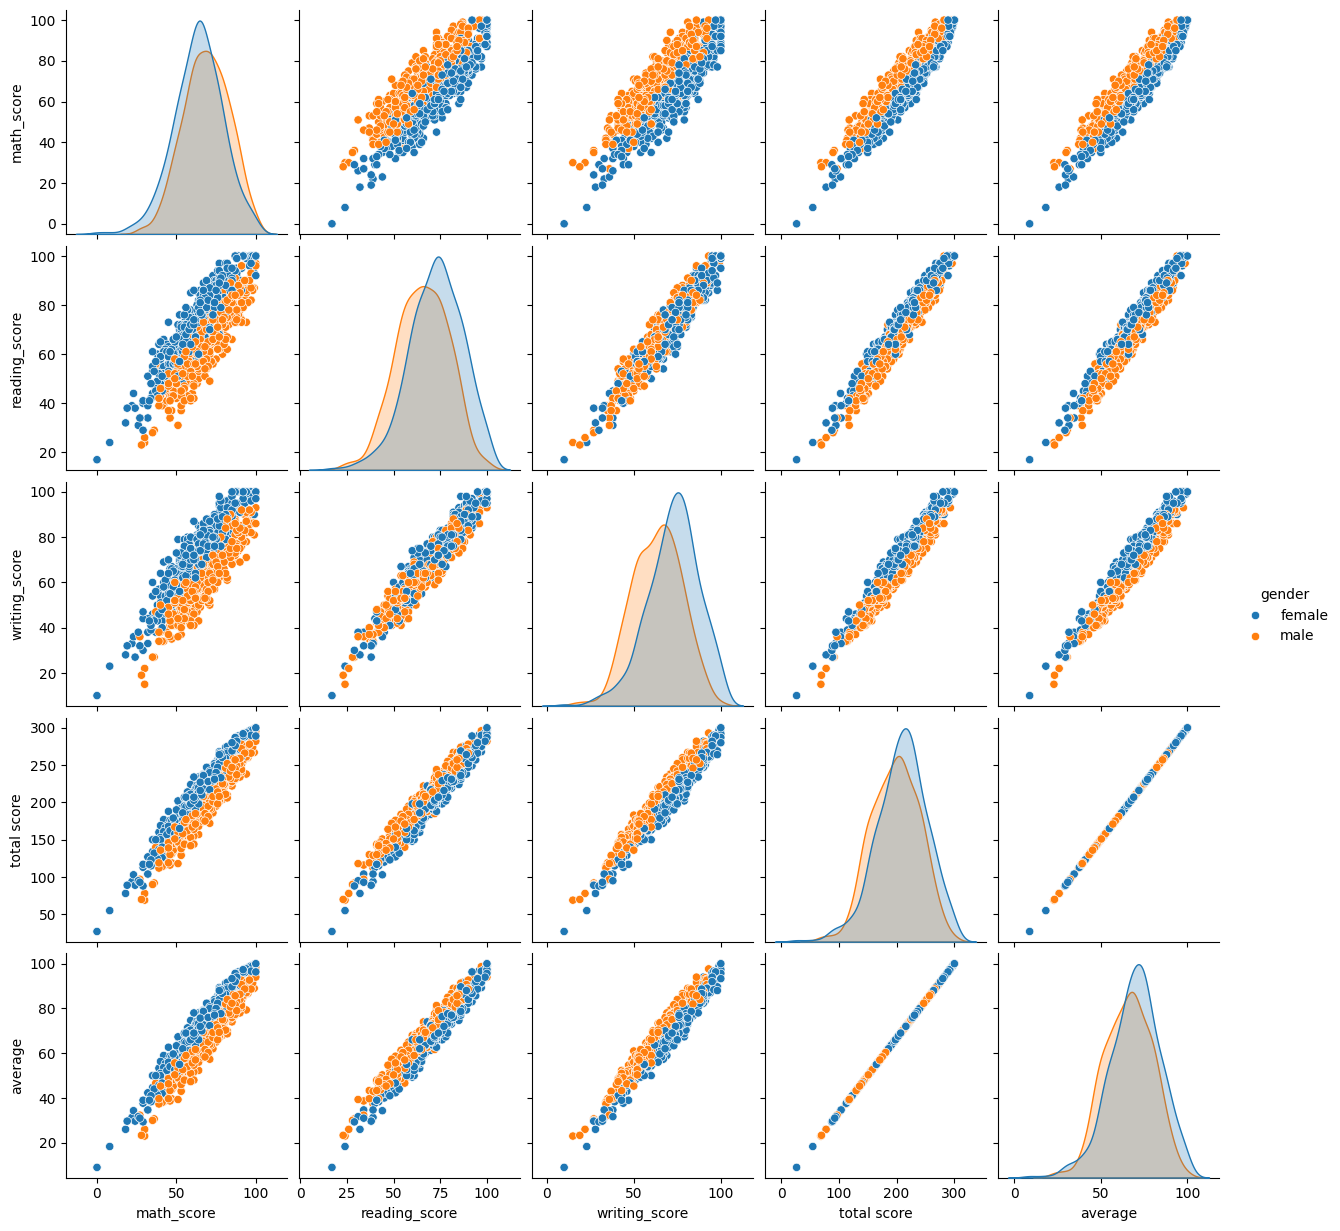

In [51]:
sns.pairplot(df,hue = 'gender')
plt.show()

**Conclusions**
*  From the above plot it is clear that all the scores increase linearly with each other.

# 5. Conclusions
*  Student's Performance is related with lunch, race, parental level education
*  Females lead in pass percentage and also are top-scorers
*  Student's Performance is not much related with test preparation course
*  Finishing preparation course is benefitial.